In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Preprocessing


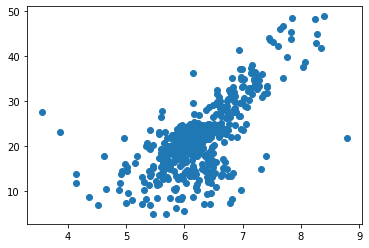

In [2]:
boston = datasets.load_boston()
x = boston.data[:,5]
y = boston.target
x = x[y<50.0]
y = y[y<50.0]
plt.scatter(x, y)
plt.show()

In [3]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Training Models(training dataset) 

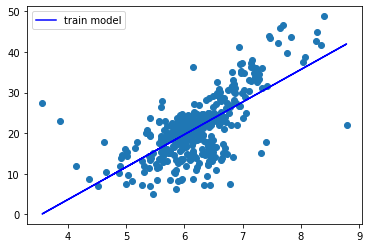

In [4]:
# 简单线性规划
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
# 分子
num = 0.0
# 分母
d = 0.0
for x_i, y_i in zip(x_train, y_train):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2
    a = num/d
    b = y_mean - a*x_mean
y_hat = a*x_train + b # 回归函数
plt.scatter(x_train, y_train)
plt.plot(x_train, y_hat, color="b", label="train model")
plt.legend()
plt.show()



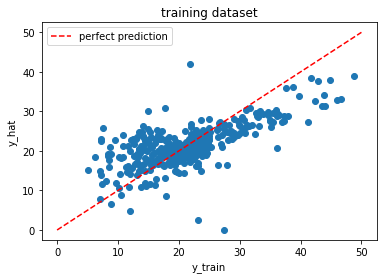

In [5]:
fig, ax=plt.subplots()
ax.scatter(y_train,y_hat)
ax.plot([0,50], [0,50], "r--", label="perfect prediction")
plt.legend()
ax.set(xlabel="y_train", ylabel="y_hat",title="training dataset")
plt.show()

# Using Models(testing dataset)

In [6]:
y_predict = a*x_test + b
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print("均方误差为：" + str(mse))
print("平均绝对误差为：" + str(mae))
rs = 1 - mse/np.var(y_test)
print("R Square = " + str(rs))

均方误差为：37.25264093539265
平均绝对误差为：4.405239784230375
R Square = 0.47714449354679345


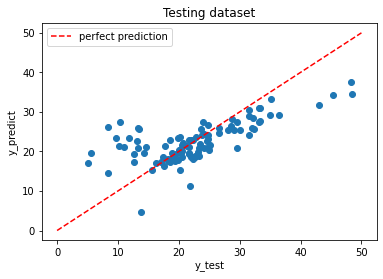

In [7]:
fig, ax=plt.subplots()
ax.scatter(y_test,y_predict)
ax.plot([0,50], [0,50], "r--", label="perfect prediction")
plt.legend()
ax.set(xlabel="y_test", ylabel="y_predict", title="Testing dataset")
plt.show()